## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import sqlite3

import warnings
warnings.filterwarnings("ignore")

## Read the data from database

In [5]:
connection = sqlite3.connect('E:\Akansha\Datasets\Amazon dataset/database.sqlite')

In [6]:
type(connection)

sqlite3.Connection

In [9]:
data=pd.read_sql_query('SELECT * FROM Reviews',connection)
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## Sentiment Analysis on Data

In [6]:
from textblob import TextBlob

polarity=[]

for i in data['Summary']:
    polarity.append(TextBlob(i).sentiment.polarity)

data['polarity']=polarity

In [9]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.7
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.8


## Positive Sentiment Analysis

positive_polarity=data[data['polarity']>0]

In [12]:
positive_polarity.shape

(331665, 11)

from wordcloud import WordCloud, STOPWORDS

stopwords=set(STOPWORDS)

total_positive_summary=' '.join(positive_polarity['Summary'])

import re

total_positive_summary=re.sub('[^a-zA-Z]',' ',total_positive_summary)
total_positive_summary

total_positive_summary=re.sub(' +',' ',total_positive_summary)
total_positive_summary

(-0.5, 999.5, 499.5, -0.5)

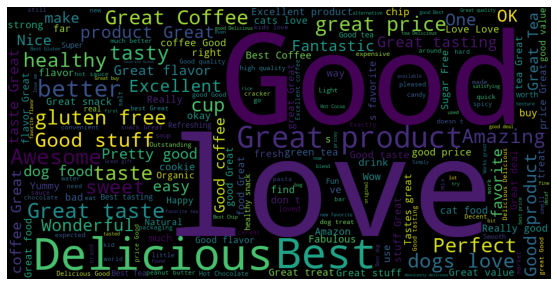

In [26]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_positive_summary)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

CONCLUSION: Words such as Good, Love, Delicious, Best are highly prioritize. Most of the times users use these words.

## Negative Sentiment Analysis

negative_polarity=data[data['polarity']<0]
negative_polarity.head()

stopwords1=set(STOPWORDS)

total_negative_summary=' '.join(negative_polarity['Summary'])
total_negative_summary

total_negative_summary=re.sub('[^a-zA-Z]',' ',total_negative_summary)
total_negative_summary

total_negative_summary=re.sub(' +',' ',total_negative_summary)
total_negative_summary

(-0.5, 999.5, 499.5, -0.5)

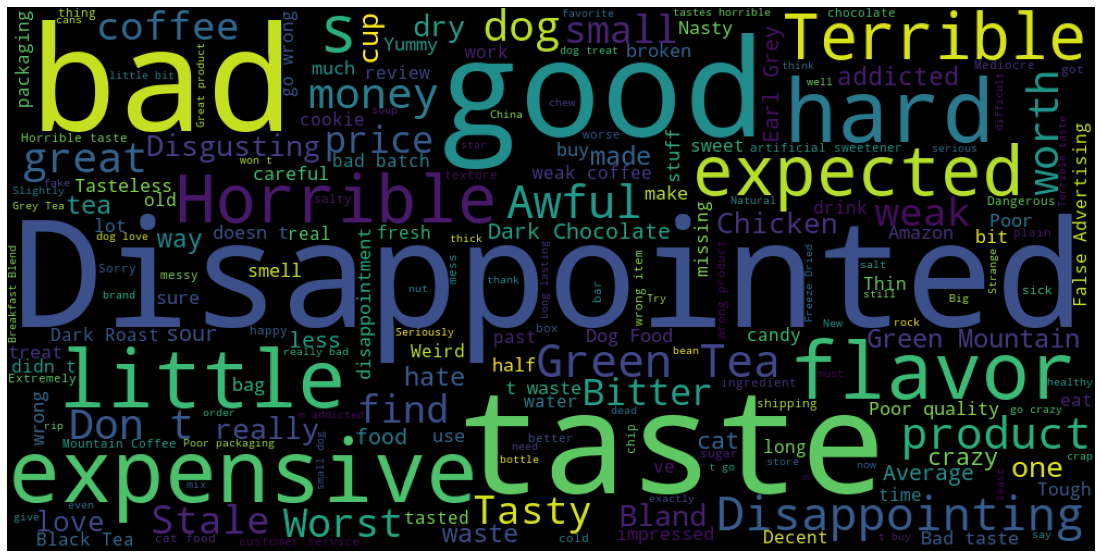

In [48]:
wordcloud1=WordCloud(width=1000,height=500,stopwords=stopwords1).generate(total_negative_summary)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud1)
plt.axis('off')

CONCLUSION: For negative compliment users preferred words such as Dissapointed, bad, terrible, expensive, etc.

## Analysis to what user Amazon can recommend more products 

In [8]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [10]:
data['UserId'].value_counts()

A3OXHLG6DIBRW8    448
A1YUL9PCJR3JTY    421
AY12DBB0U420B     389
A281NPSIMI1C2R    365
A1Z54EM24Y40LL    256
                 ... 
A30TQL09U2MWFQ      1
A3UYFPKQJ4IOAY      1
A2V3P1XE33NYC3      1
A2OWXUIXV9ES5M      1
AN7JYG5S08D7        1
Name: UserId, Length: 256059, dtype: int64

In [10]:
data['UserId'].nunique()

256059

In [16]:
top_user=data.groupby('UserId').agg({'Text':'count', 'Summary':'count','Score':'mean','ProductId':'count'}).sort_values(by='Text',ascending=False)
top_user

,Text,Summary,Score,ProductId
UserId,,,,
A3OXHLG6DIBRW8,448,448,4.535714,448
A1YUL9PCJR3JTY,421,421,4.494062,421
AY12DBB0U420B,389,389,4.647815,389
A281NPSIMI1C2R,365,365,4.841096,365
A1Z54EM24Y40LL,256,256,4.453125,256
...,...,...,...,...
A2HROKQO0GA5AF,1,1,3.000000,1
A2HROR28DMJV2W,1,1,5.000000,1
A2HRR8CO2Y20G8,1,1,5.000000,1


In [20]:
top_user.columns=['Number_of_text','Number_of_summaries','Avg_score','No._of_products_purchased']
top_user

,Number_of_text,Number_of_summaries,Avg_score,No._of_products_purchased
UserId,,,,
A3OXHLG6DIBRW8,448,448,4.535714,448
A1YUL9PCJR3JTY,421,421,4.494062,421
AY12DBB0U420B,389,389,4.647815,389
A281NPSIMI1C2R,365,365,4.841096,365
A1Z54EM24Y40LL,256,256,4.453125,256
...,...,...,...,...
A2HROKQO0GA5AF,1,1,3.000000,1
A2HROR28DMJV2W,1,1,5.000000,1
A2HRR8CO2Y20G8,1,1,5.000000,1


In [21]:
user_10=top_user.index[0:10]

In [23]:
num_10=top_user['No._of_products_purchased'][0:10]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

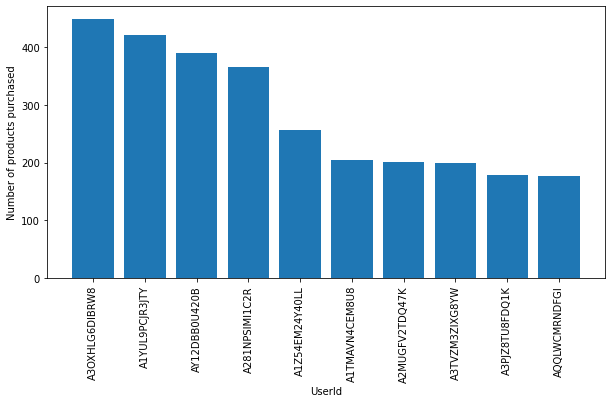

In [28]:
plt.figure(figsize=(10,5))
plt.bar(user_10,num_10,label='Most Recommended Users')
plt.xlabel('UserId')
plt.ylabel('Number of products purchased')
plt.xticks(rotation='vertical')

CONCLUSION: These are exactly my top 10 users, so we can recommend more and more products to this user id as there is high probability that these person are going to buy those product.

In [50]:
#data.sample(n=2000)
final=data[0:2000]

In [51]:
final.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [13]:
final.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
polarity                  0
dtype: int64

In [14]:
final.duplicated().sum()

0

## Analysis of Length of Comments of Customers

In [37]:
final['Text'][0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

final['Text'][0].split(' ')

In [39]:
len(final['Text'][0].split(' '))

49

In [52]:
def calculate_length(text):                                              #define the function to calculate length
    return len(text.split(' '))

In [53]:
final['Text_length']=final['Text'].apply(calculate_length)
final.head()

<ipython-input-53-ecbb28bf4e01>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Text_length
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,49
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,31
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,99
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,43
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,30


CONCLUSION : It seems that 50% of the users are going to give their feedback almost 50 words and there are only few users who are going to give lengthy feedbacks. 

## Analysis of Score or Rating

c:\users\dell\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Score', ylabel='count'>

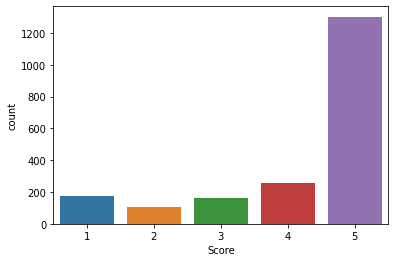

In [18]:
sns.countplot(final['Score'])

CONCLUSION : Most of the customers are going to give 5 score on any product.

## Data Cleaning for further Analysis

In [54]:
# Convert the text column in lower cases

final['Text']=final['Text'].str.lower()

<ipython-input-54-1332654c5c89>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [55]:
final['Text'][164]

'seriously this product was as tasteless as they come. there are much better tasting products out there but at 100 calories its better than a special k bar or cookie snack pack. you just have to season it or combine it with something else to share the flavor.'

In [56]:
#Program to remove special characters from text

punctuations='''!~@#$%^&*()-_+={}[]\|;,:<>.?/`'''

string=final['Text'][164]
no_punc=''

for char in string:
    if char not in punctuations:
        no_punc = no_punc+ char

no_punc        
    

'seriously this product was as tasteless as they come there are much better tasting products out there but at 100 calories its better than a special k bar or cookie snack pack you just have to season it or combine it with something else to share the flavor'

In [57]:
import string

In [58]:
# string has function name punctuations which have all the punctuations define by python

punctuation=string.punctuation

In [59]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [60]:
# Function to remove punctuation

def remove_punc(review):
    no_punc=''
    for char in review:
        if char not in punctuation:
            no_punc = no_punc+ char
    return no_punc

In [61]:
final['Text']=final['Text'].apply(remove_punc)

<ipython-input-61-0eb99769bf5d>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [62]:
# The punctuations has been removed from text column

final.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Text_length
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,i have bought several of the vitality canned d...,49
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labeled as jumbo salted peanut...,31
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",this is a confection that has been around a fe...,99
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,if you are looking for the secret ingredient i...,43
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,great taffy at a great price there was a wide...,30


In [63]:
stopwords=set(STOPWORDS)

In [64]:
final['Text'][45]

'this seems a little more wholesome than some of the supermarket brands but it is somewhat mushy and doesnt have quite as much flavor either  it didnt pass muster with my kids so i probably wont buy it again'

words=final['Text'][45].split(' ')
words

In [66]:
# Program to remove stopwords from text column

no_stopword=''

for w in words:
    if w not in stopwords:
        no_stopword= no_stopword + w
        no_stopword= no_stopword + ' '
no_stopword        

'seems little wholesome supermarket brands somewhat mushy doesnt quite much flavor either  didnt pass muster kids probably wont buy '

In [67]:
# Function to remove Stopwords

def remove_sw(review):
    no_stopword=''
    words=review.split(' ')
    for w in words:
        if w not in stopwords:
            no_stopword= no_stopword + w
            no_stopword= no_stopword + ' '
    return no_stopword


In [68]:
final['Text']=final['Text'].apply(remove_sw)

<ipython-input-68-1e11ab62c90b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [69]:
# Stopwords has been removed from Text column

final.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Text_length
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,bought several vitality canned dog food produc...,49
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labeled jumbo salted peanutsth...,31
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",confection around centuries light pillowy cit...,99
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,looking secret ingredient robitussin believe f...,43
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,great taffy great price wide assortment yummy...,30


In [70]:
final['Text'].str.contains('http?').sum()

35

There are 35 columns having hyperlink as http.

pd.set_option('display.max_rows',2000)
final['Text'].str.contains('http?')

In [72]:
hyperlink_text=final['Text'][21]
hyperlink_text

'bought husband currently overseas loves apparently staff likes alsobr generous amounts twizzlers 16ounce bag well worth price hrefhttpwwwamazoncomgpproductb001gvisjmtwizzlers strawberry 16ounce bags pack 6a '

In [73]:
# Program to remove hyperlinks from text

url_pattern=re.compile(r'href|http.\w+')
url_pattern.sub(r'',hyperlink_text)

'bought husband currently overseas loves apparently staff likes alsobr generous amounts twizzlers 16ounce bag well worth price  strawberry 16ounce bags pack 6a '

In [74]:
# Function to remove URL from text

def remove_url(review):
    url_pattern=re.compile(r'href|http.\w+')
    return url_pattern.sub(r'',review)

In [75]:
final['Text']=final['Text'].apply(remove_url)

<ipython-input-75-dc51cdc4f582>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [76]:
final['Text'].str.contains('http').sum()

0

No hyperlinks are available in the data

In [79]:
final['Text'][25]               # we need to remove br from the data

'product received advertisedbr br  strawberry 16ounce bags pack 6a '

In [82]:
final['Text'][25].replace('br','')

'product received advertised   strawberry 16ounce bags pack 6a '

In [92]:
# Program to remove br from the text

for i in range(len(final['Text'])):
    final['Text'][i]=final['Text'][i].replace('br','')

<ipython-input-92-15f070d1f63b>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\users\dell\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3418: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [86]:
text=' '.join(final['Text'])

(-0.5, 799.5, 799.5, -0.5)

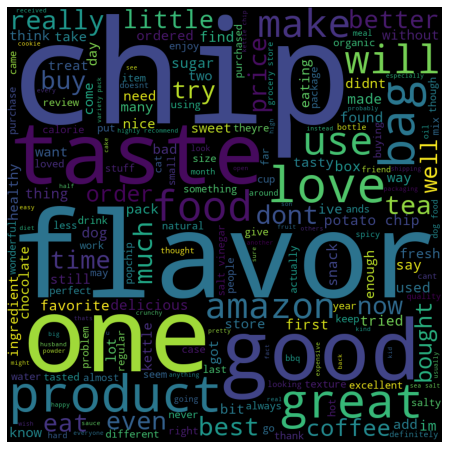

In [91]:
wordcloud=WordCloud(width=800,height=800,stopwords=stopwords).generate(text)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')

CONCLUSION: This shows the behaviour of the customers. They prefer these keywords.